# DB 종료 후 DF 작업하기
(여기서부터 시작)

In [1]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
# from sqlalchemy import create_engine
# !pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis
import os

In [2]:
# matplotlib 한글 사용

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 데이터 불러와서 가공하기

In [3]:
fd_df = pd.read_csv('./data/fine_dust.csv')
wt_df = pd.read_csv('./data/weather_data.csv')
fd_df.columns, wt_df.columns

(Index(['Unnamed: 0', 'station_id', 'station_name', 'date', 'fine_dust(㎍/㎥)'], dtype='object'),
 Index(['Unnamed: 0', 'station_id', 'station_name', 'date_time', 'avg_temp',
        'min_temp', 'max_temp', 'daily_precipitation', 'avg_wind_speed',
        'daily_snow_depth'],
       dtype='object'))

In [4]:
# 필요 컬럼만 자르기
fd_df = fd_df.loc[:, ['date', 'fine_dust(㎍/㎥)']] 
fd_df.columns=['Date', 'Fine_dust(㎍/㎥)']
wt_df = wt_df.loc[:, ['date_time', 'daily_precipitation', 'daily_snow_depth']]
wt_df.columns=['Date', 'Precipitation(mm)', 'Snow_depth(cm)']
fd_df.info(), wt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            1323 non-null   object
 1   Fine_dust(㎍/㎥)  1323 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 20.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1399 non-null   object 
 1   Precipitation(mm)  591 non-null    float64
 2   Snow_depth(cm)     92 non-null     float64
dtypes: float64(2), object(1)
memory usage: 32.9+ KB


(None, None)

In [5]:
# 미세먼지에서 아래 날짜 누락됨 (날짜 자체가 없음)
# Timestamp('2021-01-23 00:00:00'),
#  Timestamp('2021-03-01 00:00:00'),
#  Timestamp('2021-03-28 00:00:00'),
#  Timestamp('2021-04-04 00:00:00'),
#  Timestamp('2021-05-28 00:00:00'),
#  Timestamp('2021-05-30 00:00:00'),
#  Timestamp('2021-10-02 00:00:00'),
#  Timestamp('2021-11-21 00:00:00'),
#  Timestamp('2021-11-22 00:00:00'),
#  Timestamp('2022-02-15 00:00:00'),
#  Timestamp('2022-03-07 00:00:00'),
#  Timestamp('2022-03-14 00:00:00'),
#  Timestamp('2022-03-18 00:00:00'),
#  Timestamp('2022-03-19 00:00:00'),
#  Timestamp('2022-03-26 00:00:00'),
#  Timestamp('2022-04-01 00:00:00'),
#  Timestamp('2022-04-15 00:00:00'),
#  Timestamp('2022-04-29 00:00:00'),
#  Timestamp('2022-06-06 00:00:00'),
#  Timestamp('2022-06-07 00:00:00'),
#  Timestamp('2022-06-24 00:00:00'),
#  Timestamp('2022-06-30 00:00:00'),
#  Timestamp('2022-08-02 00:00:00'),
#  Timestamp('2022-08-08 00:00:00'),
#  Timestamp('2022-08-09 00:00:00'),
#  Timestamp('2022-09-05 00:00:00'),
#  Timestamp('2022-09-06 00:00:00'),
#  Timestamp('2022-10-06 00:00:00'),
#  Timestamp('2022-10-08 00:00:00'),
#  Timestamp('2022-10-10 00:00:00'),
#  Timestamp('2022-10-25 00:00:00'),
#  Timestamp('2022-10-26 00:00:00'),
#  Timestamp('2023-01-14 00:00:00'),
#  Timestamp('2023-01-15 00:00:00'),
#  Timestamp('2023-04-05 00:00:00'),
#  Timestamp('2023-05-05 00:00:00'),
#  Timestamp('2023-05-06 00:00:00'),
#  Timestamp('2023-06-09 00:00:00'),
#  Timestamp('2023-07-09 00:00:00'),
#  Timestamp('2023-08-08 00:00:00'),
#  Timestamp('2023-08-09 00:00:00'),
#  Timestamp('2023-08-10 00:00:00'),
#  Timestamp('2023-09-08 00:00:00'),
#  Timestamp('2023-09-21 00:00:00'),
#  Timestamp('2023-09-26 00:00:00'),
#  Timestamp('2023-11-10 00:00:00'),
#  Timestamp('2023-12-11 00:00:00'),
#  Timestamp('2023-12-12 00:00:00'),
#  Timestamp('2023-12-14 00:00:00'),
#  Timestamp('2023-12-15 00:00:00'),
#  Timestamp('2024-01-20 00:00:00'),
#  Timestamp('2024-02-05 00:00:00'),
#  Timestamp('2024-02-21 00:00:00'),
#  Timestamp('2024-02-22 00:00:00'),
#  Timestamp('2024-03-25 00:00:00'),
#  Timestamp('2024-03-26 00:00:00'),
#  Timestamp('2024-03-27 00:00:00'),
#  Timestamp('2024-05-06 00:00:00'),
#  Timestamp('2024-05-15 00:00:00'),
#  Timestamp('2024-05-16 00:00:00'),
#  Timestamp('2024-05-17 00:00:00'),
#  Timestamp('2024-06-03 00:00:00'),
#  Timestamp('2024-07-22 00:00:00'),
#  Timestamp('2024-07-23 00:00:00'),
#  Timestamp('2024-07-24 00:00:00'),
#  Timestamp('2024-09-12 00:00:00'),
#  Timestamp('2024-09-16 00:00:00'),
#  Timestamp('2024-09-21 00:00:00'),
#  Timestamp('2024-09-22 00:00:00'),
#  Timestamp('2024-09-23 00:00:00'),
#  Timestamp('2024-09-24 00:00:00'),
#  Timestamp('2024-09-27 00:00:00'),
#  Timestamp('2024-10-19 00:00:00'),
#  Timestamp('2024-10-20 00:00:00'),
#  Timestamp('2024-10-23 00:00:00'),
#  Timestamp('2024-10-29 00:00:00')

In [6]:
# 미세먼지, 비, 눈 데이터프레임 합치기
df = pd.merge(left=fd_df, right=wt_df, how='outer', on="Date")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1399 non-null   object 
 1   Fine_dust(㎍/㎥)     1323 non-null   float64
 2   Precipitation(mm)  591 non-null    float64
 3   Snow_depth(cm)     92 non-null     float64
dtypes: float64(3), object(1)
memory usage: 43.8+ KB


### 날짜를 기준으로 년, 계절, 평일/주말(+공휴일) 나누기

df의 Date의 타입 변경

In [7]:
df.info() # date 타입이 object임을 확인
df['Date'] = pd.to_datetime(df['Date'])
df.info() # date타입이 datetime64[ns]으로 변경됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               1399 non-null   object 
 1   Fine_dust(㎍/㎥)     1323 non-null   float64
 2   Precipitation(mm)  591 non-null    float64
 3   Snow_depth(cm)     92 non-null     float64
dtypes: float64(3), object(1)
memory usage: 43.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1399 non-null   datetime64[ns]
 1   Fine_dust(㎍/㎥)     1323 non-null   float64       
 2   Precipitation(mm)  591 non-null    float64       
 3   Snow_depth(cm)     92 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 43.8 KB


In [8]:
# fine_dust["Date"]에 따라 평일, 주말 나누기(월~금 : 0~4, 토일 : 5, 6)
df["Day"] = np.where(df["Date"].dt.weekday < 5, "Weekday", "Weekend")
df


,Date,Fine_dust(㎍/㎥),Precipitation(mm),Snow_depth(cm),Day
0,2021-01-01,36.0,NaN,NaN,Weekday
1,2021-01-02,43.0,NaN,NaN,Weekend
2,2021-01-03,47.0,NaN,NaN,Weekend
3,2021-01-04,50.0,0.0,0.0,Weekday
4,2021-01-05,37.0,0.0,0.0,Weekday
...,...,...,...,...,...
1394,2024-10-26,26.0,NaN,NaN,Weekend
1395,2024-10-27,27.0,0.0,NaN,Weekend
1396,2024-10-28,38.0,0.0,NaN,Weekday
1397,2024-10-29,NaN,0.0,NaN,Weekday


공휴일 데이터인 hd의 date의 타입 변경

In [9]:
hd = pd.read_csv('./data/hd_21_24.csv', encoding="CP949")
hd.rename(columns={"일시":"date"}, inplace=True)
hd['date'] = pd.to_datetime(hd['date'])
hd.columns=['Date', 'dateName']
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      66 non-null     datetime64[ns]
 1   dateName  66 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.2+ KB


fine_dust['Day_type'] 만들어서 평일/주말+공휴일로 나누기 (공휴일은 주말로 처리)

In [10]:
# df와 hd DF 합치기
m_df = pd.merge(df, hd, how='outer', on='Date')
m_df.head()

,Date,Fine_dust(㎍/㎥),Precipitation(mm),Snow_depth(cm),Day,dateName
0,2021-01-01,36.0,NaN,NaN,Weekday,1월1일
1,2021-01-02,43.0,NaN,NaN,Weekend,NaN
2,2021-01-03,47.0,NaN,NaN,Weekend,NaN
3,2021-01-04,50.0,0.0,0.0,Weekday,NaN
4,2021-01-05,37.0,0.0,0.0,Weekday,NaN


In [11]:
# date_name2 시리즈를 만들어서 
# dateName이 있다면, 주말처리
# 없다면, Day의 평일/주말 값을 가져오기
# apply 활용
date_name2 = m_df.apply(lambda row : 'Weekend' 
                        if str(row['dateName']) != 'nan' else row['Day'], axis=1)

In [12]:
# apply 활용해서 평일, 주말(+공휴일)로 나눈 값을
# 합친 df에 적용하기 
m_df['Day_type'] = date_name2

# 필요한 컬럼/행으로 자르기
m_df = m_df.loc[:, ['Date', 'Fine_dust(㎍/㎥)',  'Precipitation(mm)', 'Snow_depth(cm)', 'Day_type']]
m_df = m_df.iloc[:1329, :]
m_df.head(1), m_df.tail(1)

(        Date  Fine_dust(㎍/㎥)  Precipitation(mm)  Snow_depth(cm) Day_type
 0 2021-01-01            36.0                NaN             NaN  Weekend,
            Date  Fine_dust(㎍/㎥)  Precipitation(mm)  Snow_depth(cm) Day_type
 1328 2024-08-21            13.0               42.2             NaN  Weekday)

병합된 DF을 계절별, 연도별로 구분하기

In [13]:
# Date를 기준으로 계절별 구분 
# (봄: 3~5, 여름: 6~8, 가을: 9~11, 겨울: 12~2)
conditions = [
    ( m_df["Date"].dt.month >= 3 ) & ( m_df["Date"].dt.month <= 5 ),
    ( m_df["Date"].dt.month >= 6 ) & ( m_df["Date"].dt.month <= 8 ),
    ( m_df["Date"].dt.month >= 9 ) & ( m_df["Date"].dt.month <= 11 ),
]
Season = ["Spring", "Summer", "Fall"]
m_df["Season"] = np.select(conditions, Season, default="Winter")

print( m_df.iloc[58:60, :] )
print( m_df.iloc[150:152, :] )
print( m_df.iloc[242:244, :] )
print( m_df.iloc[333:335, :] )

         Date  Fine_dust(㎍/㎥)  Precipitation(mm)  Snow_depth(cm) Day_type  \
58 2021-02-28            32.0                NaN             NaN  Weekend   
59 2021-03-01             NaN               67.5             2.3  Weekend   

    Season  
58  Winter  
59  Spring  
          Date  Fine_dust(㎍/㎥)  Precipitation(mm)  Snow_depth(cm) Day_type  \
150 2021-05-31            59.0                4.0             NaN  Weekday   
151 2021-06-01            52.0                3.2             NaN  Weekday   

     Season  
150  Spring  
151  Summer  
          Date  Fine_dust(㎍/㎥)  Precipitation(mm)  Snow_depth(cm) Day_type  \
242 2021-08-31            37.0               77.4             NaN  Weekday   
243 2021-09-01             9.0                0.8             NaN  Weekday   

     Season  
242  Summer  
243    Fall  
          Date  Fine_dust(㎍/㎥)  Precipitation(mm)  Snow_depth(cm) Day_type  \
333 2021-11-30            31.0               27.2             NaN  Weekday   
334 2021-12-01     

In [14]:
# Date를 기준으로 연도별 구분 
m_df["Year"] = m_df["Date"].dt.year
print( m_df.iloc[364:366, :] )

          Date  Fine_dust(㎍/㎥)  Precipitation(mm)  Snow_depth(cm) Day_type  \
364 2021-12-31            21.0                NaN             NaN  Weekday   
365 2022-01-01            34.0                NaN             NaN  Weekend   

     Season  Year  
364  Winter  2021  
365  Winter  2022  


결측치 처리

In [15]:
# 미세먼지 - 결측치는 계절별 평균으로 입력

# m_df[m_df['Fine_dust(㎍/㎥)'].isnull()] # 미세먼지에서 결측치 확인 

# 계절별 평균 구하기
Season_means = m_df.groupby('Season')['Fine_dust(㎍/㎥)'].mean()
Season_means
                # Fall      29.830116
                # Spring    57.397101
                # Summer    28.134503
                # Winter    46.641509

# 결측치행에 평균값 넣기
m_df["Fine_dust(㎍/㎥)"] = m_df["Fine_dust(㎍/㎥)"]. \
                        fillna(m_df.groupby("Season")["Fine_dust(㎍/㎥)"].transform("mean"))

m_df[m_df['Fine_dust(㎍/㎥)'].isnull()]

,Date,Fine_dust(㎍/㎥),Precipitation(mm),Snow_depth(cm),Day_type,Season,Year


In [16]:
# 강수량, 적설량 - 결측치는 0으로 입력
m_df.fillna({"Precipitation(mm)": 0, "Snow_depth(cm)": 0}, inplace=True)
m_df.isnull().sum()

Date                 0
Fine_dust(㎍/㎥)       0
Precipitation(mm)    0
Snow_depth(cm)       0
Day_type             0
Season               0
Year                 0
dtype: int64

미세먼지/강수량/적설량 등급 메기기

In [17]:
# 미세먼지
# 좋음 (0-30 ㎍/m³) → Good
# 보통 (31-80 ㎍/m³) → Moderate
# 나쁨 (81-150 ㎍/m³) → Bad
# 매우 나쁨 (151 ㎍/m³ 이상) → Very Bad

# 새로운 컬럼을 생성하고 조건에 따라 값 입력
conditionlist = [
    (m_df['Fine_dust(㎍/㎥)'] <= 30),
    (m_df['Fine_dust(㎍/㎥)'] > 30) & (m_df['Fine_dust(㎍/㎥)'] <= 80),
    (m_df['Fine_dust(㎍/㎥)'] > 80) & (m_df['Fine_dust(㎍/㎥)'] <= 150),
    (m_df['Fine_dust(㎍/㎥)'] > 150),
]

values = ['Good', 'Normal', 'Bad', 'Very_bad']

m_df["FD_Grade"] = np.select(conditionlist, values, default="Unknown")
m_df.head(2)

,Date,Fine_dust(㎍/㎥),Precipitation(mm),Snow_depth(cm),Day_type,Season,Year,FD_Grade
0,2021-01-01,36.0,0.0,0.0,Weekend,Winter,2021,Normal
1,2021-01-02,43.0,0.0,0.0,Weekend,Winter,2021,Normal


In [18]:
# 강수량
# 건조 (Dry): 강수량이 없는 날, 즉 0mm
# 약강수 (Light): 0mm < 강수량 ≤ 10mm
# 중강수 (Moderate): 10mm < 강수량 ≤ 50mm
# 대강수 (Heavy): 강수량 > 50mm

# 새로운 컬럼을 생성하고 조건에 따라 값 입력
conditionlist = [
    (m_df['Precipitation(mm)'] == 00),
    (m_df['Precipitation(mm)'] > 00) & (m_df['Precipitation(mm)'] <= 10),
    (m_df['Precipitation(mm)'] > 10) & (m_df['Precipitation(mm)'] <= 50),
    (m_df['Precipitation(mm)'] > 50),
]

values = ['Dry', 'Light', 'Moderate', 'Heavy']

m_df["P_Grade"] = np.select(conditionlist, values, default="Dry")
m_df.head(2)

,Date,Fine_dust(㎍/㎥),Precipitation(mm),Snow_depth(cm),Day_type,Season,Year,FD_Grade,P_Grade
0,2021-01-01,36.0,0.0,0.0,Weekend,Winter,2021,Normal,Dry
1,2021-01-02,43.0,0.0,0.0,Weekend,Winter,2021,Normal,Dry


In [19]:
# 적설량
# 무적설 (No Snow): 적설량 = 0cm
# 소적설 (Light Snow): 0cm < 적설량 ≤ 2cm
# 중적설 (Moderate Snow): 2cm < 적설량 ≤ 10cm
# 대적설 (Heavy Snow): 적설량 > 10cm

# 새로운 컬럼을 생성하고 조건에 따라 값 입력
conditionlist = [
    (m_df['Snow_depth(cm)'] == 00),
    (m_df['Snow_depth(cm)'] > 00) & (m_df['Snow_depth(cm)'] <= 2),
    (m_df['Snow_depth(cm)'] > 2) & (m_df['Snow_depth(cm)'] <= 10),
    (m_df['Snow_depth(cm)'] > 10),
]

values = ['No_Snow', 'Light_Snow', 'Moderate_Snow', 'Heavy_Snow']

m_df["S_Grade"] = np.select(conditionlist, values, default="Dry")
m_df.head(2)

,Date,Fine_dust(㎍/㎥),Precipitation(mm),Snow_depth(cm),Day_type,Season,Year,FD_Grade,P_Grade,S_Grade
0,2021-01-01,36.0,0.0,0.0,Weekend,Winter,2021,Normal,Dry,No_Snow
1,2021-01-02,43.0,0.0,0.0,Weekend,Winter,2021,Normal,Dry,No_Snow


범주화

In [20]:
# 범주화 - 계절/미세먼지등급/강수량등급/적설량등급
# 순서있는 범주형 : ordered = True, 순서 없는 범주형 : ordered = False
c_Season = ["Spring", "Summer", "Fall", "Winter"]
c_Season1 = CategoricalDtype(categories = c_Season, ordered = True)

c_FD_Grade = ['Good', 'Normal', 'Bad', 'Very_bad']
c_FD_Grade1 = CategoricalDtype(categories = c_FD_Grade, ordered = True)

c_P_Grade = ['Dry', 'Light', 'Moderate', 'Heavy']
c_P_Grade1 = CategoricalDtype(categories = c_P_Grade, ordered = True)

c_S_Grade = ['No_Snow', 'Light_Snow', 'Moderate_Snow', 'Heavy_Snow']
c_S_Grade1 = CategoricalDtype(categories = c_S_Grade, ordered = True)

m_df["Season"] = m_df["Season"].astype(c_Season1)
m_df["FD_Grade"] = m_df["FD_Grade"].astype(c_FD_Grade1)
m_df["P_Grade"] = m_df["P_Grade"].astype(c_P_Grade1)
m_df["S_Grade"] = m_df["S_Grade"].astype(c_S_Grade1)
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1329 non-null   datetime64[ns]
 1   Fine_dust(㎍/㎥)     1329 non-null   float64       
 2   Precipitation(mm)  1329 non-null   float64       
 3   Snow_depth(cm)     1329 non-null   float64       
 4   Day_type           1329 non-null   object        
 5   Season             1329 non-null   category      
 6   Year               1329 non-null   int32         
 7   FD_Grade           1329 non-null   category      
 8   P_Grade            1329 non-null   category      
 9   S_Grade            1329 non-null   category      
dtypes: category(4), datetime64[ns](1), float64(3), int32(1), object(1)
memory usage: 63.2+ KB


### 데이터 분석

1. 단일 그룹 분석

- 미세먼지 (단일 그룹 분석)

In [62]:
def group_analysis_by_single_column_FD(df, group_col_name, col_name):
    # 그룹화
    grouped_df = df.groupby(group_col_name, observed=True)

    # 그룹별 최대/최소/평균/분산/빈도 계산
    stats = grouped_df[col_name].agg([
        ("Max", "max"),
        ("Min", "min"),
        ("Mean", "mean"),
        ("Median", "median"),
        ("Variance", "var"),
        ("Count", "count")
    ])
    return stats

# 단일 그룹 분석 결과를 데이터 프레임으로 저장
FDdf_year_stats = group_analysis_by_single_column_FD(
                    df = m_df, 
                    group_col_name = "Year", 
                    col_name = "Fine_dust(㎍/㎥)")
FDdf_grade_stats = group_analysis_by_single_column_FD(
                    df = m_df, 
                    group_col_name = "FD_Grade", 
                    col_name = "Fine_dust(㎍/㎥)")
FDdf_season_stats = group_analysis_by_single_column_FD(
                    df = m_df, 
                    group_col_name = "Season", 
                    col_name = "Fine_dust(㎍/㎥)")
FDdf_day_stats = group_analysis_by_single_column_FD(
                    df = m_df, 
                    group_col_name = "Day_type", 
                    col_name = "Fine_dust(㎍/㎥)")

# 딕셔너리로 데이터프레입 합치기
combined_stats_fd1 = {
    "Year": FDdf_year_stats,
    "FD_Grade": FDdf_grade_stats,
    "Season": FDdf_season_stats,
    "Day_type": FDdf_day_stats
}

print( "단일 그룹 분석 - 미세먼지")
# 결과 확인
for key, value in combined_stats_fd1.items():
    print(f"\n\n{key} Stats: (미세먼지)\n", value)


단일 그룹 분석 - 미세먼지


Year Stats: (미세먼지)
         Max   Min       Mean  Median     Variance  Count
Year                                                    
2021  389.0   9.0  48.038678    39.0  1621.539179    365
2022  247.0   8.0  36.338550    31.0   442.696783    365
2023  333.0  10.0  41.331598    33.0   896.079919    365
2024  277.0  10.0  37.802922    31.0   661.655190    234


FD_Grade Stats: (미세먼지)
             Max    Min        Mean  Median     Variance  Count
FD_Grade                                                      
Good       30.0    8.0   22.611884    24.0    29.075668    570
Normal     79.0   31.0   46.454164    44.0   150.487833    680
Bad       148.0   81.0  106.938462   105.0   263.902404     65
Very_bad  389.0  152.0  235.785714   207.5  7523.104396     14


Season Stats: (미세먼지)
           Max   Min       Mean  Median     Variance  Count
Season                                                    
Spring  389.0  11.0  57.397101    48.5  1981.429420    368
Summer   72.0  

- 시각화 (단일 그룹 분석)

C:\Users\human\AppData\Local\Temp\ipykernel_6580\1201468895.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1, 1].legend()


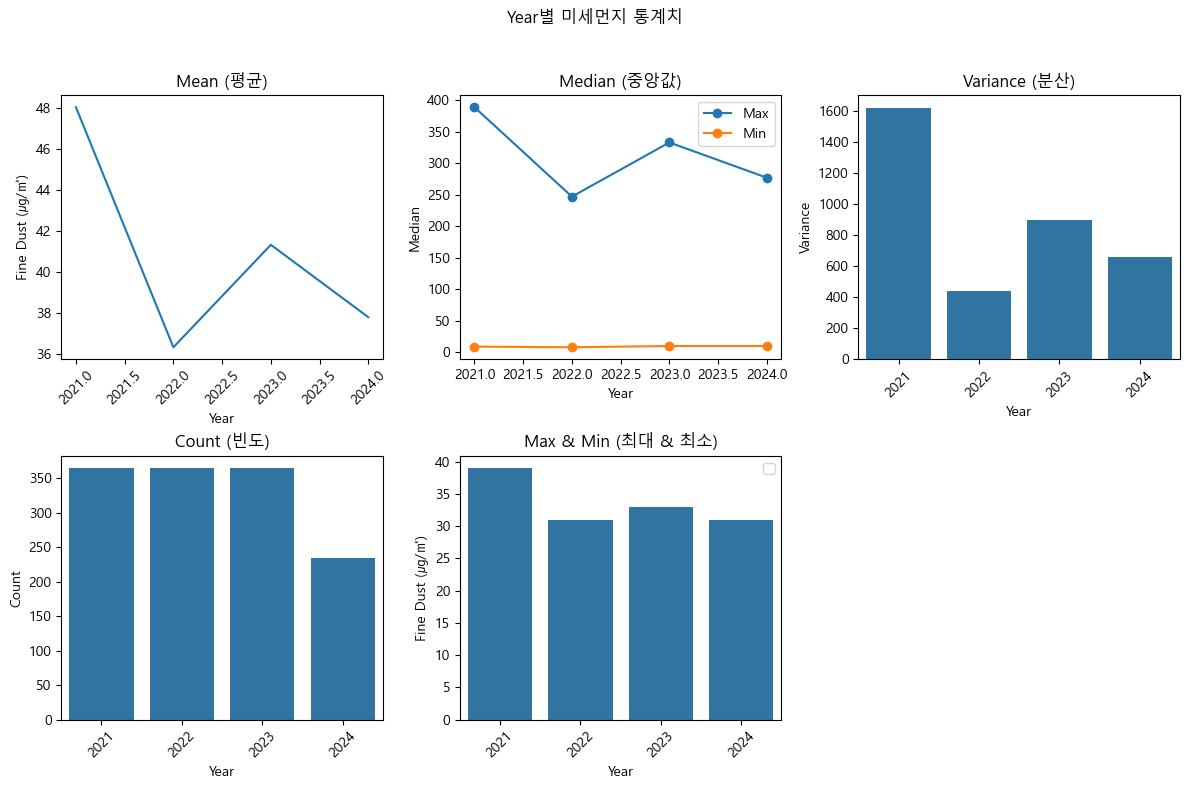

C:\Users\human\AppData\Local\Temp\ipykernel_6580\1201468895.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1, 1].legend()


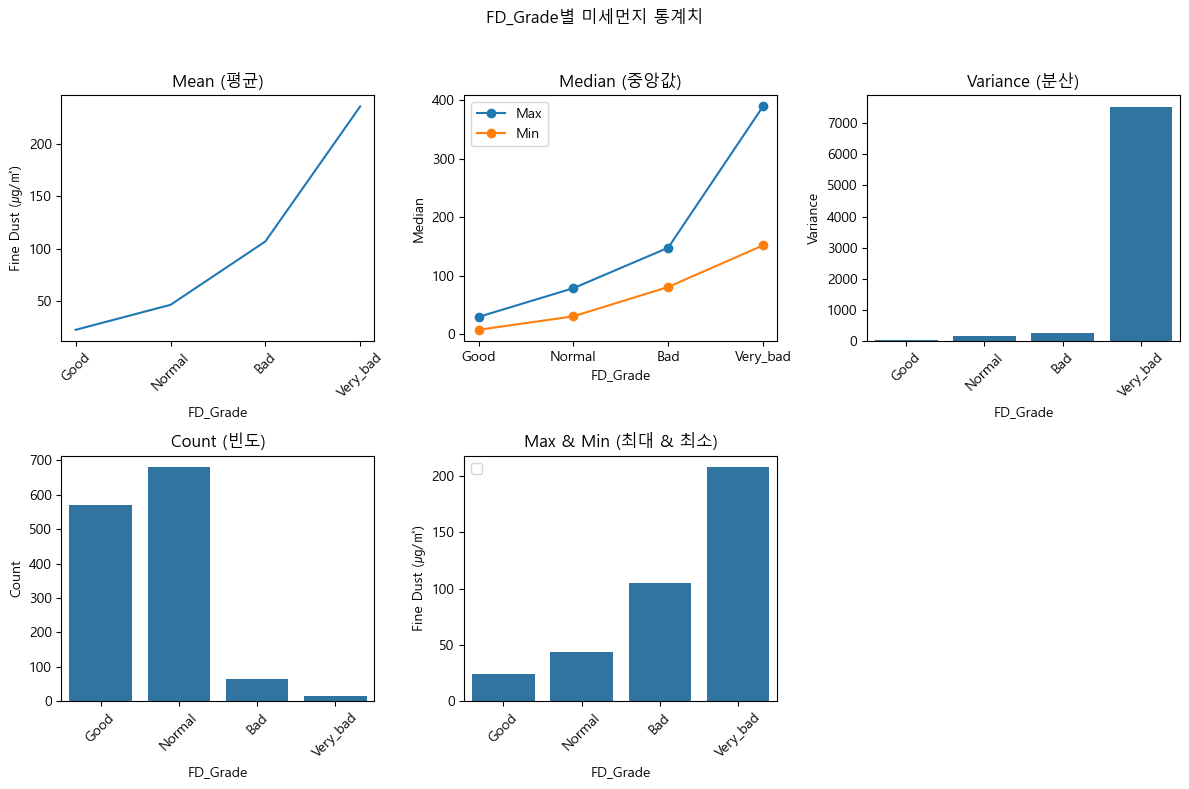

C:\Users\human\AppData\Local\Temp\ipykernel_6580\1201468895.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1, 1].legend()


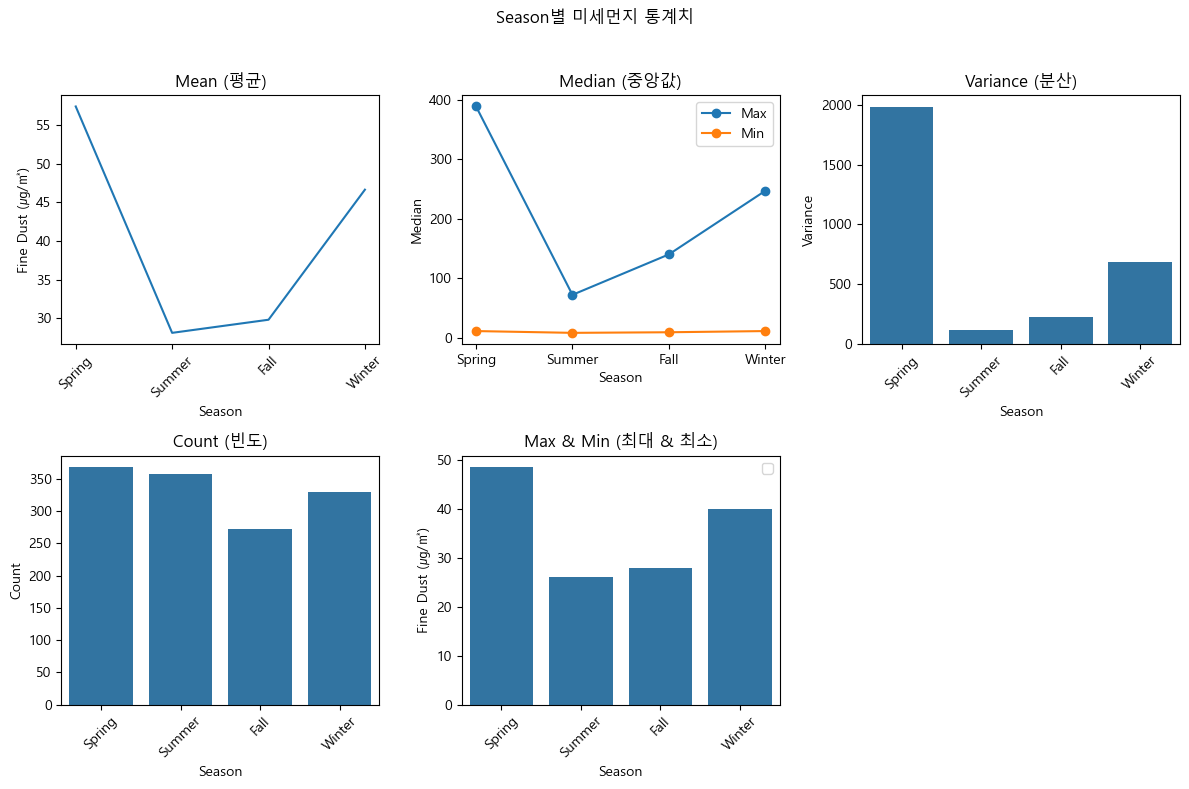

C:\Users\human\AppData\Local\Temp\ipykernel_6580\1201468895.py:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1, 1].legend()


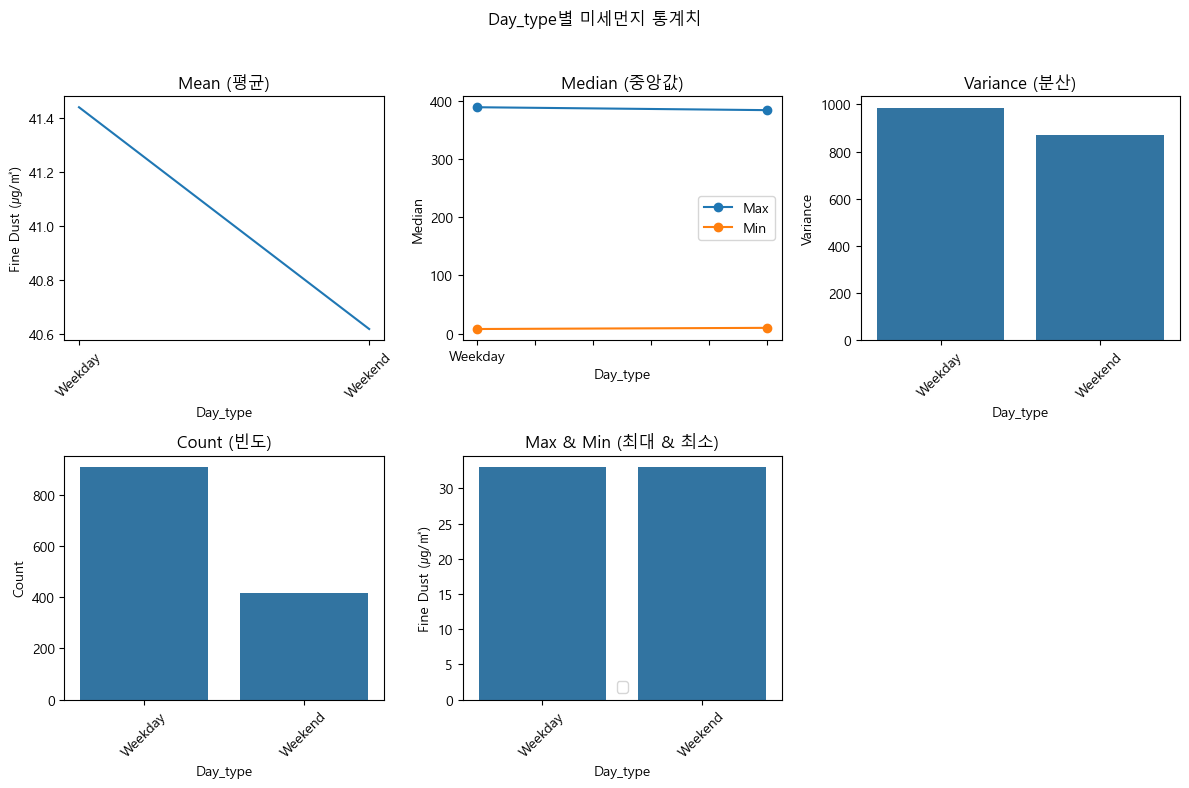

In [65]:
# 통계치 시각화 함수 정의 (수정)
def plot_statistics(stats_df, group_name):
    # Plot 설정
    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    fig.suptitle(f'{group_name}별 미세먼지 통계치')
    
    # Plot 1: Mean (평균)
    sns.lineplot(data=stats_df, x=stats_df.index, y="Mean", ax=axes[0, 0])
    axes[0, 0].set_title("Mean (평균)")
    axes[0, 0].set_ylabel("Fine Dust (㎍/㎥)")
    axes[0, 0].tick_params(axis='x', rotation=45)

    # Plot 2: Median (중앙값)
    sns.barplot(data=stats_df, x=stats_df.index, y="Median", ax=axes[1, 1])
    axes[0, 1].set_title("Median (중앙값)")
    axes[0, 1].set_ylabel("Median")
    axes[0, 1].tick_params(axis='x', rotation=45)

    # Plot 3: Variance (분산)
    sns.barplot(data=stats_df, x=stats_df.index, y="Variance", ax=axes[0, 2])
    axes[0, 2].set_title("Variance (분산)")
    axes[0, 2].set_ylabel("Variance")
    axes[0, 2].tick_params(axis='x', rotation=45)

    # Plot 4: Count (빈도)
    sns.barplot(data=stats_df, x=stats_df.index, y="Count", ax=axes[1, 0])
    axes[1, 0].set_title("Count (빈도)")
    axes[1, 0].set_ylabel("Count")
    axes[1, 0].tick_params(axis='x', rotation=45)

    # Plot 5: Max and Min (최대 및 최소)
    stats_df[["Max", "Min"]].plot(kind='line', ax=axes[0, 1], marker='o')
    axes[1, 1].set_title("Max & Min (최대 & 최소)")
    axes[1, 1].set_ylabel("Fine Dust (㎍/㎥)")
    axes[1, 1].legend()
    axes[1, 1].tick_params(axis='x', rotation=45)

    # 빈 그래프 (Plot 6) - 필요에 따라 추가할 수도 있음
    axes[1, 2].axis('off')  # 마지막 그래프는 비워둠
    
    # 레이아웃 조정
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # 제목과 간격 조절
    plt.show()

# 통계치 데이터프레임별로 그래프 그리기
for key, stats_df in combined_stats_fd1.items():
    plot_statistics(stats_df, key)


In [ ]:
# 그래프 해석
# 연도별 분석 결과:
# 시계열 그래프를 보면 연도에 따른 미세먼지 농도가 전반적으로 감소하는 추세
# 분산을 나타내는 막대 그래프도 연도별로 감소하는 경향을 보여, 
# 미세먼지 농도의 변동성이 줄어들고 있음을 시사함

# 등급별 분석:
# 미세먼지 등급별 빈도를 보여주는 막대 그래프에서는 '좋음'과 '보통' 등급의 빈도가 높게 나타남
# 고농도 등급으로 갈수록 빈도가 낮아지는 것을 확인

# 계절별 특성:
# 계절성이 뚜렷하게 나타나며, 주로 겨울철과 봄철에 미세먼지 농도가 높고
# 여름철에는 상대적으로 낮은 농도를 보이는 패턴이 관찰

# 평일/주말 비교:
# 평일과 주말의 미세먼지 농도 차이가 있으며
# 이는 아마도 차량 통행량이나 산업활동의 차이에서 기인했을 것으로 추정됨

# 전반적인 시사점:
# 미세먼지 관리 정책이 어느 정도 효과를 보이고 있는 것으로 보여짐 (연도별 감소 추세)
# 계절적 요인이 미세먼지 농도에 큰 영향을 미치므로, 계절별 맞춤형 대응이 필요
# 평일/주말의 차이는 인간 활동이 미세먼지 발생에 영향을 미친다고 추정됨

# 이 데이터를 바탕으로 더 효과적인 미세먼지 관리 정책을 수립하거나, 
# 시민들의 생활패턴에 맞는 예보 시스템을 구축하는 데 활용할 수 있을 것 같음

2. 두 개 변수 조합 분석

In [40]:
# 2-1. 연도와 등급을 조합해서 분석
# 2-2. 연도와 계절을 조합해서 분석
# 2-3. 연도와 평일/주말을 조합해서 분석
# 2-4. 등급과 계절을 조합해서 분석
# 2-5. 등급과 평일/주말을 조합해서 분석
# 2-6. 계절과 평일/주말을 조합해서 분석

- 미세먼저 (두개 변수 조합 분석)

In [41]:
def group_analysis_by_two_columns_FD(df, group_col1, group_col2, target_col):
    # 두 컬럼으로 그룹화
    grouped_df = df.groupby([group_col1, group_col2], observed=True)
    
    # 통계 계산 및 컬럼 이름 지정 (열 이름, 계산 방법)
    stats = grouped_df[target_col].agg([
    ("Max", "max"),
    ("Min", "min"),
    ("Mean", "mean"),
    ("Variance", "var"),
    ("Count", "count"),
    ("Median", "median"),                   # 중앙값
    ("Q1", lambda x: x.quantile(0.25)),     # 1사분위수 (Q1)
    ("Q3", lambda x: x.quantile(0.75)),     # 3사분위수 (Q3)
    ("IQR", lambda x: x.quantile(0.75) - x.quantile(0.25)),     # IQR
    ("Skewness", lambda x: skew(x)),        # 왜도
    ("Kurtosis", lambda x: kurtosis(x)),    # 첨도
    ("Range", lambda x: x.max() - x.min())  # 범위
])
    return stats

# 함수 실행 예시
df_Year_FD_Grade_stats = group_analysis_by_two_columns_FD(
    df = m_df,
    group_col1 = "Year", 
    group_col2 = "FD_Grade", 
    target_col = "Fine_dust(㎍/㎥)")
df_Year_Season_stats = group_analysis_by_two_columns_FD(
    df = m_df,
    group_col1 = "Year", 
    group_col2 = "Season", 
    target_col = "Fine_dust(㎍/㎥)")
df_Year_day_stats = group_analysis_by_two_columns_FD(
    df = m_df,
    group_col1 = "Year", 
    group_col2 = "Day_type", 
    target_col = "Fine_dust(㎍/㎥)")
df_FD_Grade_Season_stats = group_analysis_by_two_columns_FD(
    df = m_df,
    group_col1 = "FD_Grade", 
    group_col2 = "Season", 
    target_col = "Fine_dust(㎍/㎥)")
df_FD_Grade_day_stats = group_analysis_by_two_columns_FD(
    df = m_df,
    group_col1 = "FD_Grade", 
    group_col2 = "Day_type", 
    target_col = "Fine_dust(㎍/㎥)")
df_Season_day_stats = group_analysis_by_two_columns_FD(
    df = m_df,
    group_col1 = "Season", 
    group_col2 = "Day_type", 
    target_col = "Fine_dust(㎍/㎥)")

# 결과를 딕셔너리로 정리
double_group_stats_fd2 = {
    "Year-FD_Grade": df_Year_FD_Grade_stats,
    "Year-Season": df_Year_Season_stats,
    "Year-Day": df_Year_day_stats,
    "FD_Grade-Season": df_FD_Grade_Season_stats,
    "FD_Grade-Day": df_FD_Grade_day_stats,
    "Season-Day": df_Season_day_stats
}

# 결과 출력
print("2. 이중 그룹 분석 - 미세먼지")
for key, value in double_group_stats_fd2.items():
    print(f"\n{key} Stats: (미세먼지)\n", value)

2. 이중 그룹 분석 - 미세먼지

Year-FD_Grade Stats: (미세먼지)
                  Max    Min        Mean      Variance  Count      Median  \
Year FD_Grade                                                              
2021 Good       30.0    9.0   21.688387     27.700068    130   22.000000   
     Normal     78.0   31.0   48.628856    158.954940    195   46.641509   
     Bad       146.0   81.0  107.558824    291.041889     34  107.500000   
     Very_bad  389.0  156.0  262.500000  11896.300000      6  243.500000   
2022 Good       30.0    8.0   23.458820     28.303111    176   25.000000   
     Normal     79.0   31.0   44.711703    130.878643    181   41.000000   
     Bad       129.0   88.0  104.333333    205.466667      6  100.500000   
     Very_bad  247.0  169.0  208.000000   3042.000000      2  208.000000   
2023 Good       30.0   10.0   22.284722     31.214416    151   23.000000   
     Normal     78.0   31.0   46.458544    169.915082    192   43.500000   
     Bad       148.0   88.0  106.666667

- 시각화 (두개 변수 조합 분석)

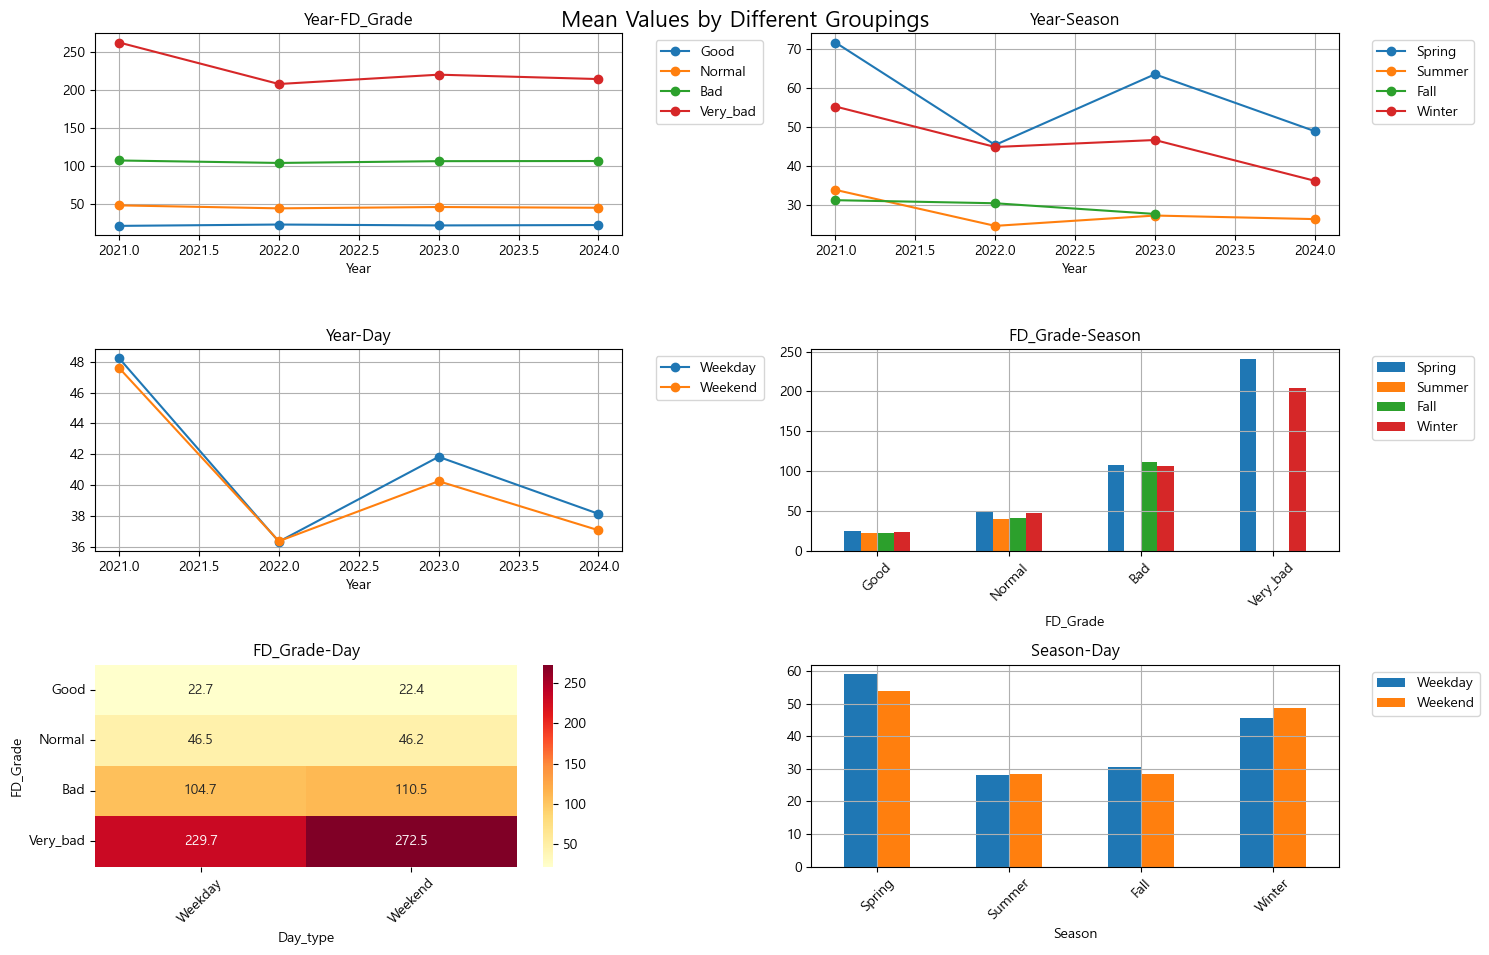

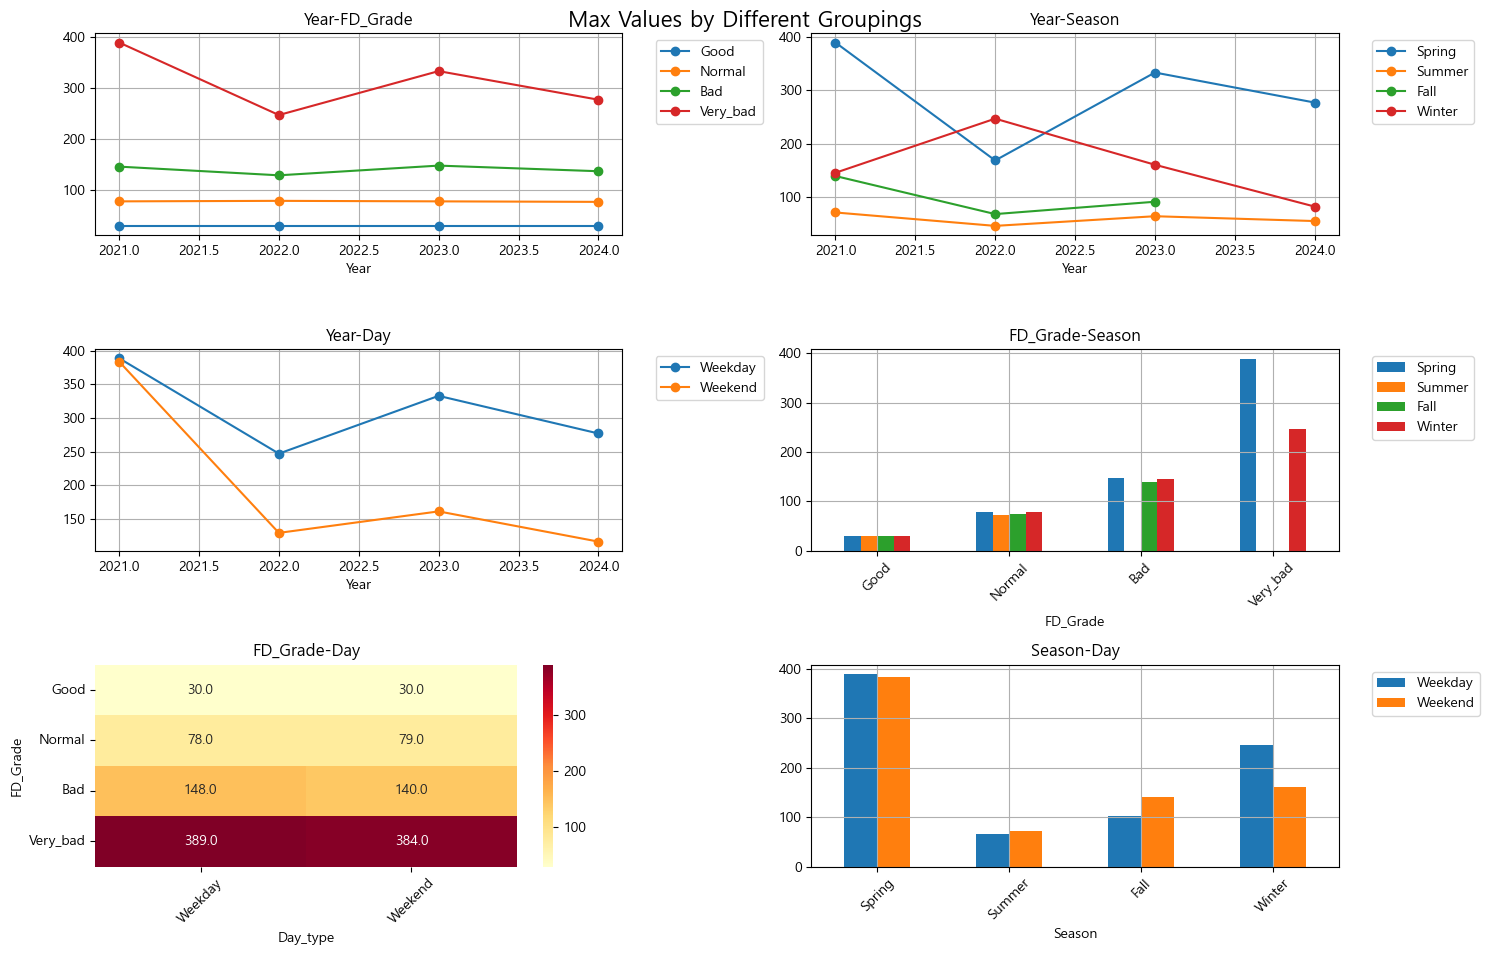

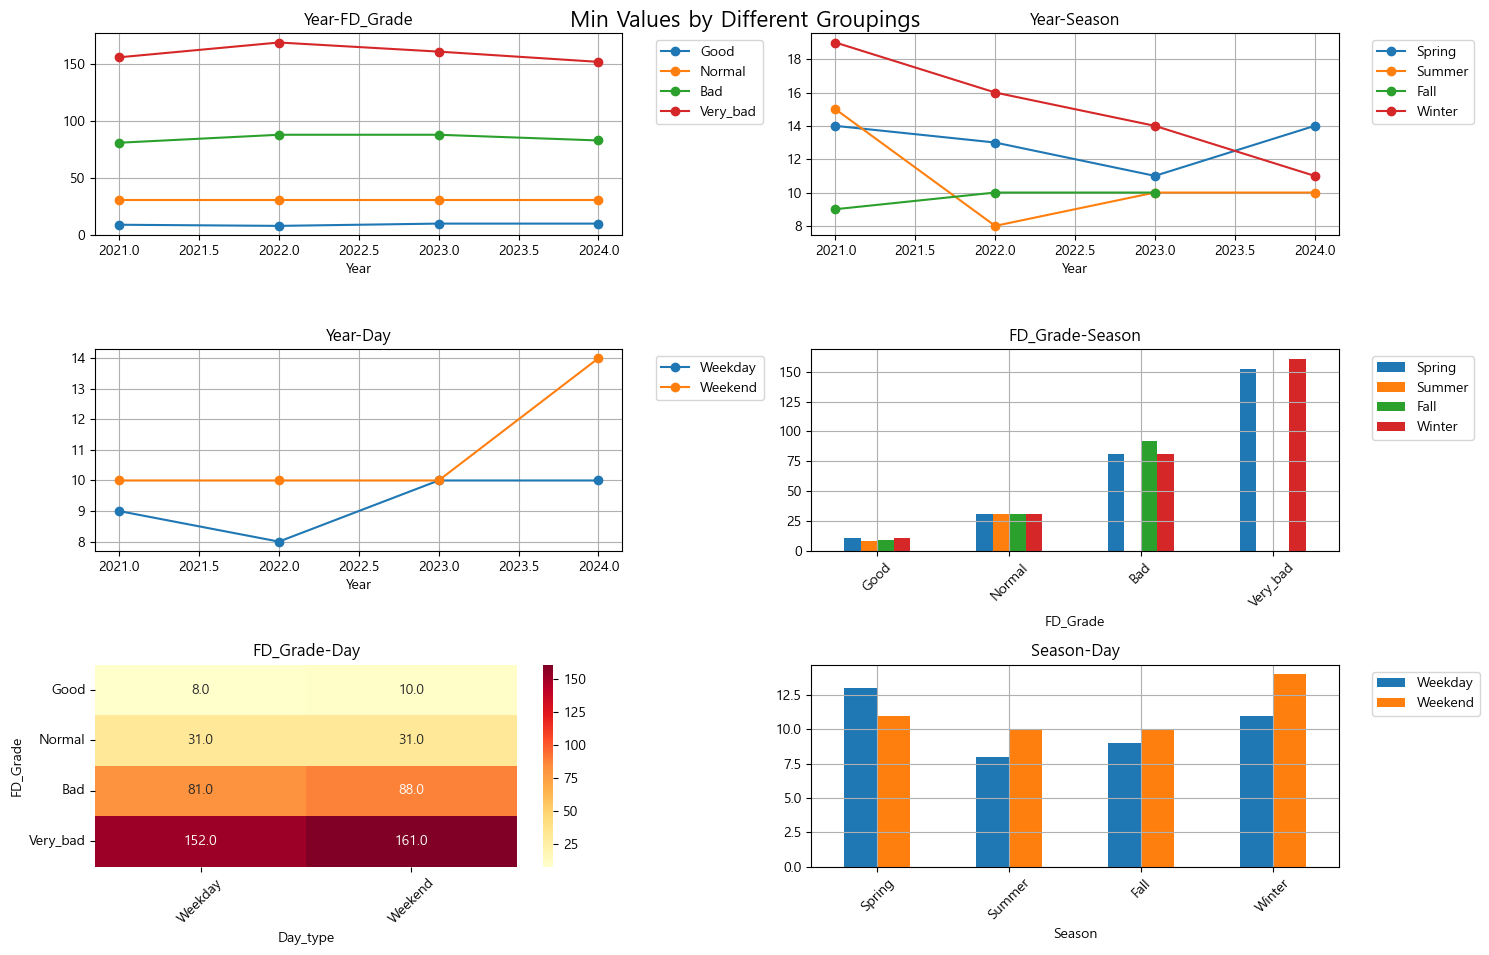

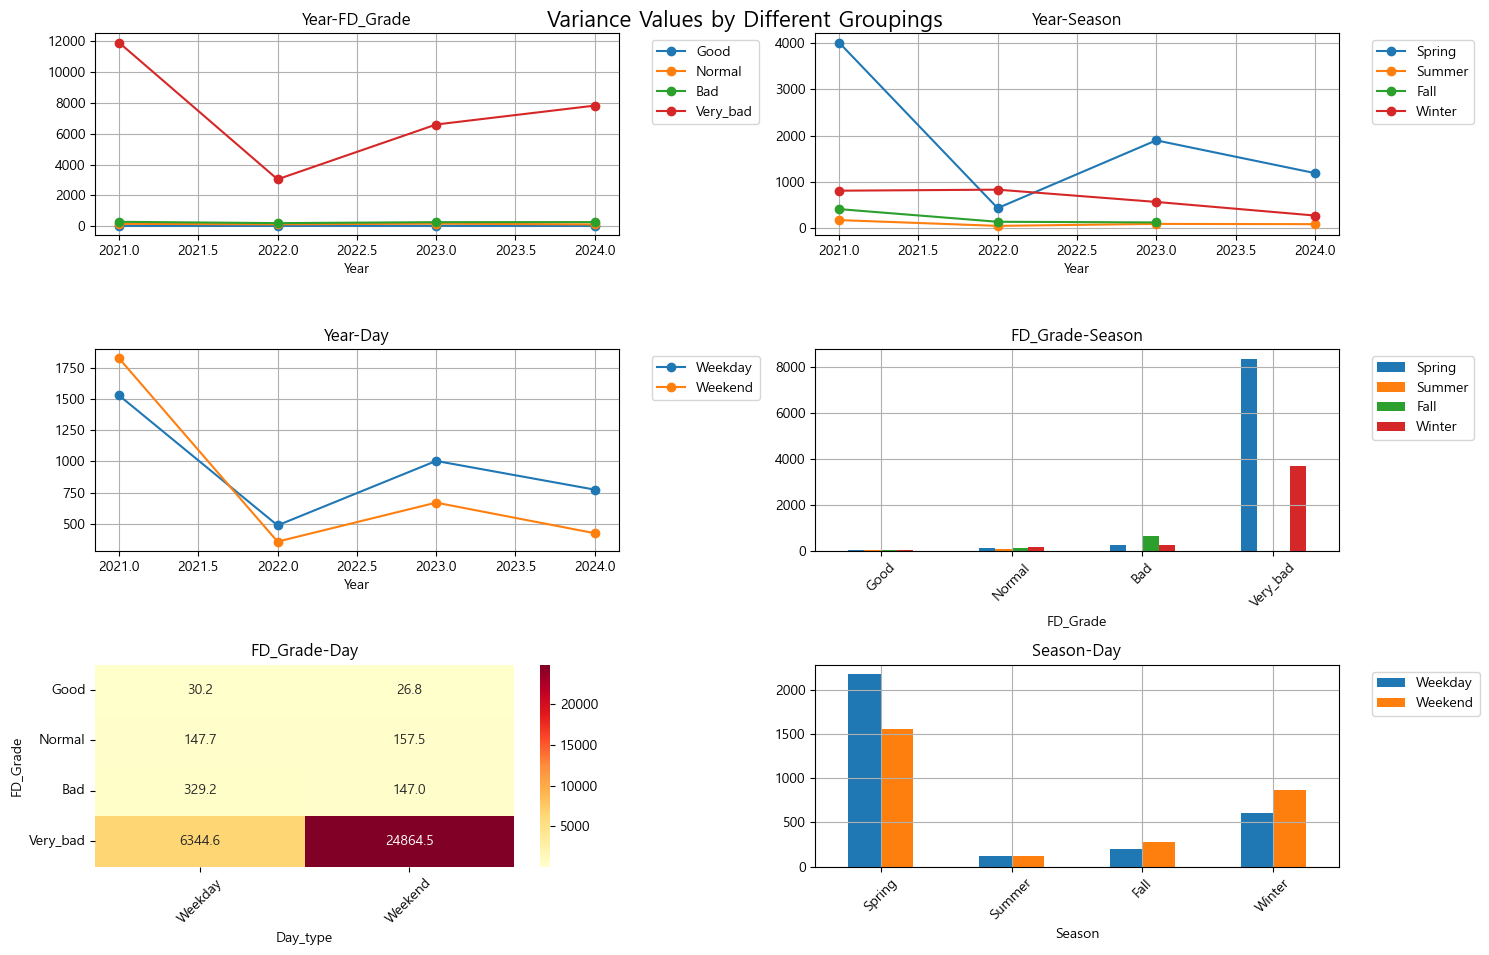

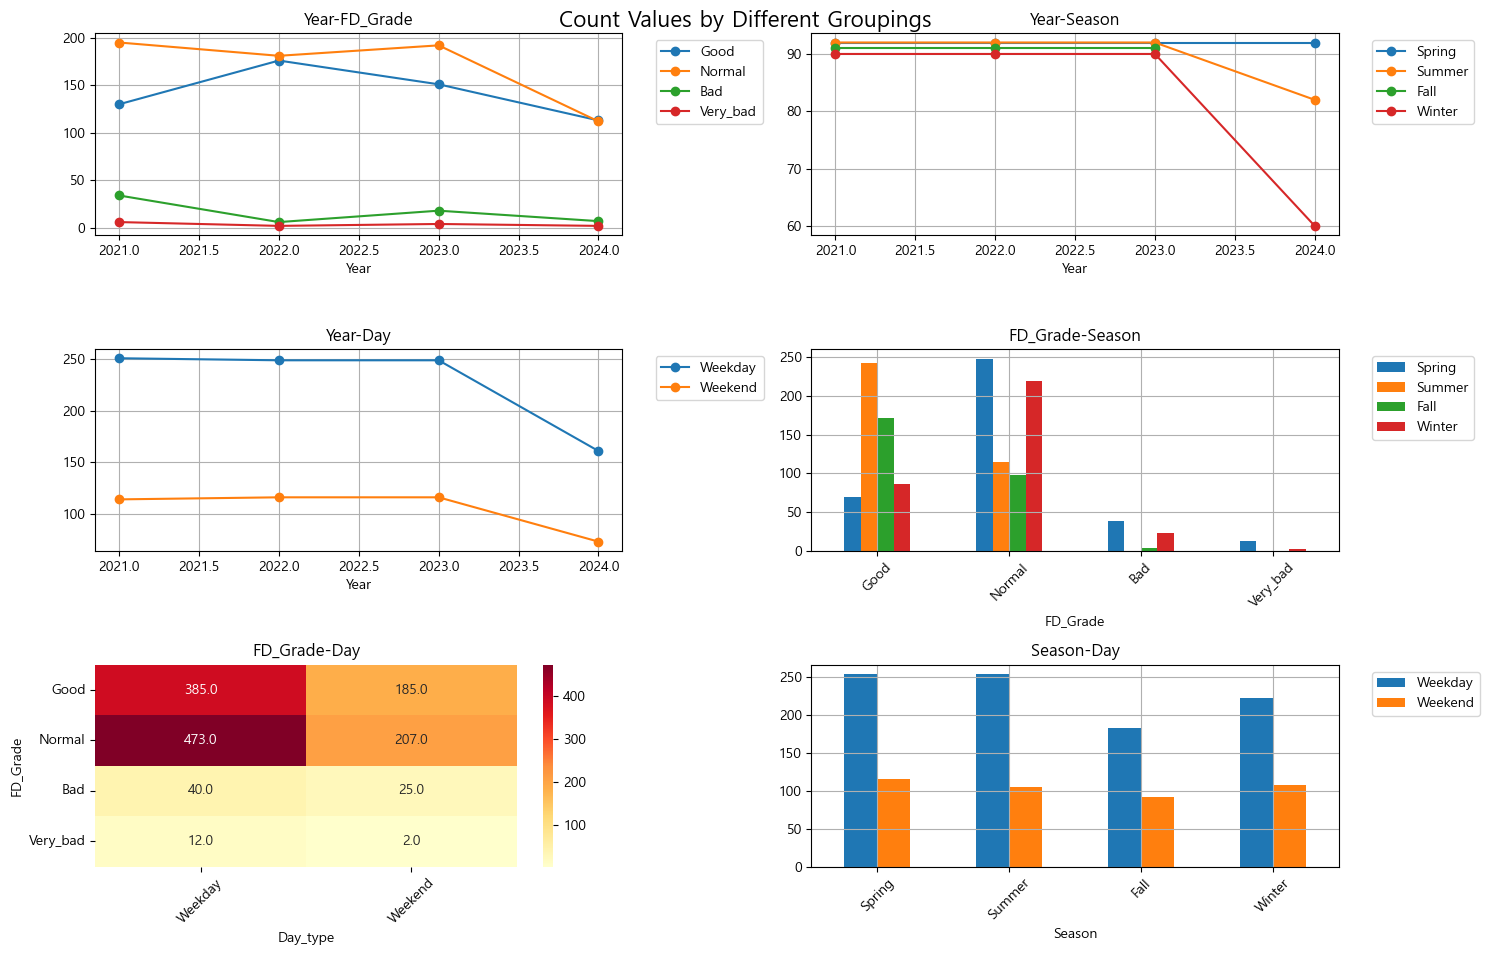

In [53]:
def create_double_group_plots(stats_dict, metric="Mean", figsize=(15, 10)):
    """
    Create visualization for double-grouped statistics
    
    Parameters:
    stats_dict: Dictionary containing the grouped statistics
    metric: The statistical measure to plot (e.g., "Mean", "Max", "Min")
    figsize: Size of the figure
    """
    
    def plot_heatmap(data, title, ax):
        # Reset index to get grouping columns as regular columns
        plot_data = data[metric].unstack()
        
        # Create heatmap
        sns.heatmap(plot_data, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax)
        ax.set_title(title)
        plt.setp(ax.get_xticklabels(), rotation=45)
        plt.setp(ax.get_yticklabels(), rotation=0)

    def plot_line(data, title, ax):
        # Reset index to get grouping columns as regular columns
        plot_data = data[metric].unstack()
        
        # Plot lines
        plot_data.plot(marker='o', ax=ax)
        ax.set_title(title)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True)

    def plot_bar(data, title, ax):
        # Reset index to get grouping columns as regular columns
        plot_data = data[metric].unstack()
        
        # Plot bars
        plot_data.plot(kind='bar', ax=ax)
        ax.set_title(title)
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.setp(ax.get_xticklabels(), rotation=45)
        ax.grid(True)

    # Create subplots for each group combination
    n_plots = len(stats_dict)
    n_rows = (n_plots + 1) // 2  # Round up division
    
    fig = plt.figure(figsize=figsize)
    fig.suptitle(f'{metric} Values by Different Groupings', fontsize=16, y=0.95)
    
    for i, (key, stats) in enumerate(stats_dict.items(), 1):
        ax = plt.subplot(n_rows, 2, i)
        
        # Choose plot type based on the data structure
        if 'Year' in key:
            plot_line(stats, key, ax)
        elif 'Season' in key:
            plot_bar(stats, key, ax)
        else:
            plot_heatmap(stats, key, ax)
            
    plt.tight_layout()
    plt.show()

# 각 통계치별로 그래프 생성
metrics = ["Mean", "Max", "Min", "Variance", "Count"]
for metric in metrics:
    create_double_group_plots(double_group_stats_fd2, metric=metric)

3. 세 개 변수 조합 분석

In [42]:
# 3-1. 연도와 등급과 계절을 조합해서 분석
# 3-2. 연도와 등급과 평일/주말을 조합해서 분석
# 3-3. 등급과 계절과 평일/주말을 주합해서 분석

- 미세먼지 (세개 변수 조합 분석)

In [43]:
def group_analysis_by_three_columns_FD(df, group_col1, group_col2, group_col3, target_col):
    # 세 컬럼으로 그룹화
    grouped_df = df.groupby([group_col1, group_col2, group_col3], observed=True)

    # 통계 계산 및 컬럼 이름 지정
    stats = grouped_df[target_col].agg([
    ("Max", "max"),                    # (열 이름, 계산 방법)
    ("Min", "min"),
    ("Mean", "mean"),
    ("Variance", "var"),
    ("Count", "count"),
    ("Median", "median"),                   # 중앙값
    ("Q1", lambda x: x.quantile(0.25)),     # 1사분위수 (Q1)
    ("Q3", lambda x: x.quantile(0.75)),     # 3사분위수 (Q3)
    ("IQR", lambda x: x.quantile(0.75) - x.quantile(0.25)),     # IQR
    ("Skewness", lambda x: skew(x)),        # 왜도
    ("Kurtosis", lambda x: kurtosis(x)),    # 첨도
    ("Range", lambda x: x.max() - x.min())  # 범위
])
    return stats

# 함수 실행 예시
df_Year_FD_Grade_Season_stats = group_analysis_by_three_columns_FD(
                                df = m_df,
                                group_col1 = "Year", 
                                group_col2 = "FD_Grade", 
                                group_col3 = "Season", 
                                target_col = "Fine_dust(㎍/㎥)")
df_Year_FD_Grade_day_stats = group_analysis_by_three_columns_FD(
                                df = m_df,
                                group_col1 = "Year", 
                                group_col2 = "FD_Grade", 
                                group_col3 = "Day_type", 
                                target_col = "Fine_dust(㎍/㎥)")
df_FD_Grade_Season_day_stats = group_analysis_by_three_columns_FD(
                                df = m_df,
                                group_col1 = "FD_Grade", 
                                group_col2 = "Season", 
                                group_col3 = "Day_type", 
                                target_col = "Fine_dust(㎍/㎥)")

# 결과를 딕셔너리로 정리
triple_group_stats_FD3 = {
    "Year-FD_Grade-Season": df_Year_FD_Grade_Season_stats,
    "Year-FD_Grade-Day": df_Year_FD_Grade_day_stats,
    "FD_Grade-Season-Day": df_FD_Grade_Season_day_stats,
}

# 결과 출력
print("2. 삼중 그룹 분석 - 미세먼지")
for key, value in triple_group_stats_FD3.items():
    print(f"\n{key} Stats: (미세먼지)\n", value)

2. 삼중 그룹 분석 - 미세먼지

Year-FD_Grade-Season Stats: (미세먼지)
                         Max    Min        Mean      Variance  Count  \
Year FD_Grade Season                                                  
2021 Good     Spring   30.0   14.0   23.071429     22.686813     14   
              Summer   30.0   15.0   23.173913     18.546860     46   
              Fall     30.0    9.0   19.323895     31.758664     54   
              Winter   30.0   19.0   24.187500     15.362500     16   
     Normal   Spring   78.0   31.0   52.399736    133.182502     55   
              Summer   72.0   32.0   44.652174    104.276329     46   
              Fall     74.0   31.0   44.571429    143.134454     35   
              Winter   78.0   31.0   50.621043    202.871095     59   
     Bad      Spring  132.0   81.0  106.705882    296.970588     17   
              Fall    140.0  102.0  121.000000    722.000000      2   
              Winter  146.0   81.0  106.733333    267.638095     15   
     Very_bad Spring 

- 시각화 (세개 변수 조합 분석)

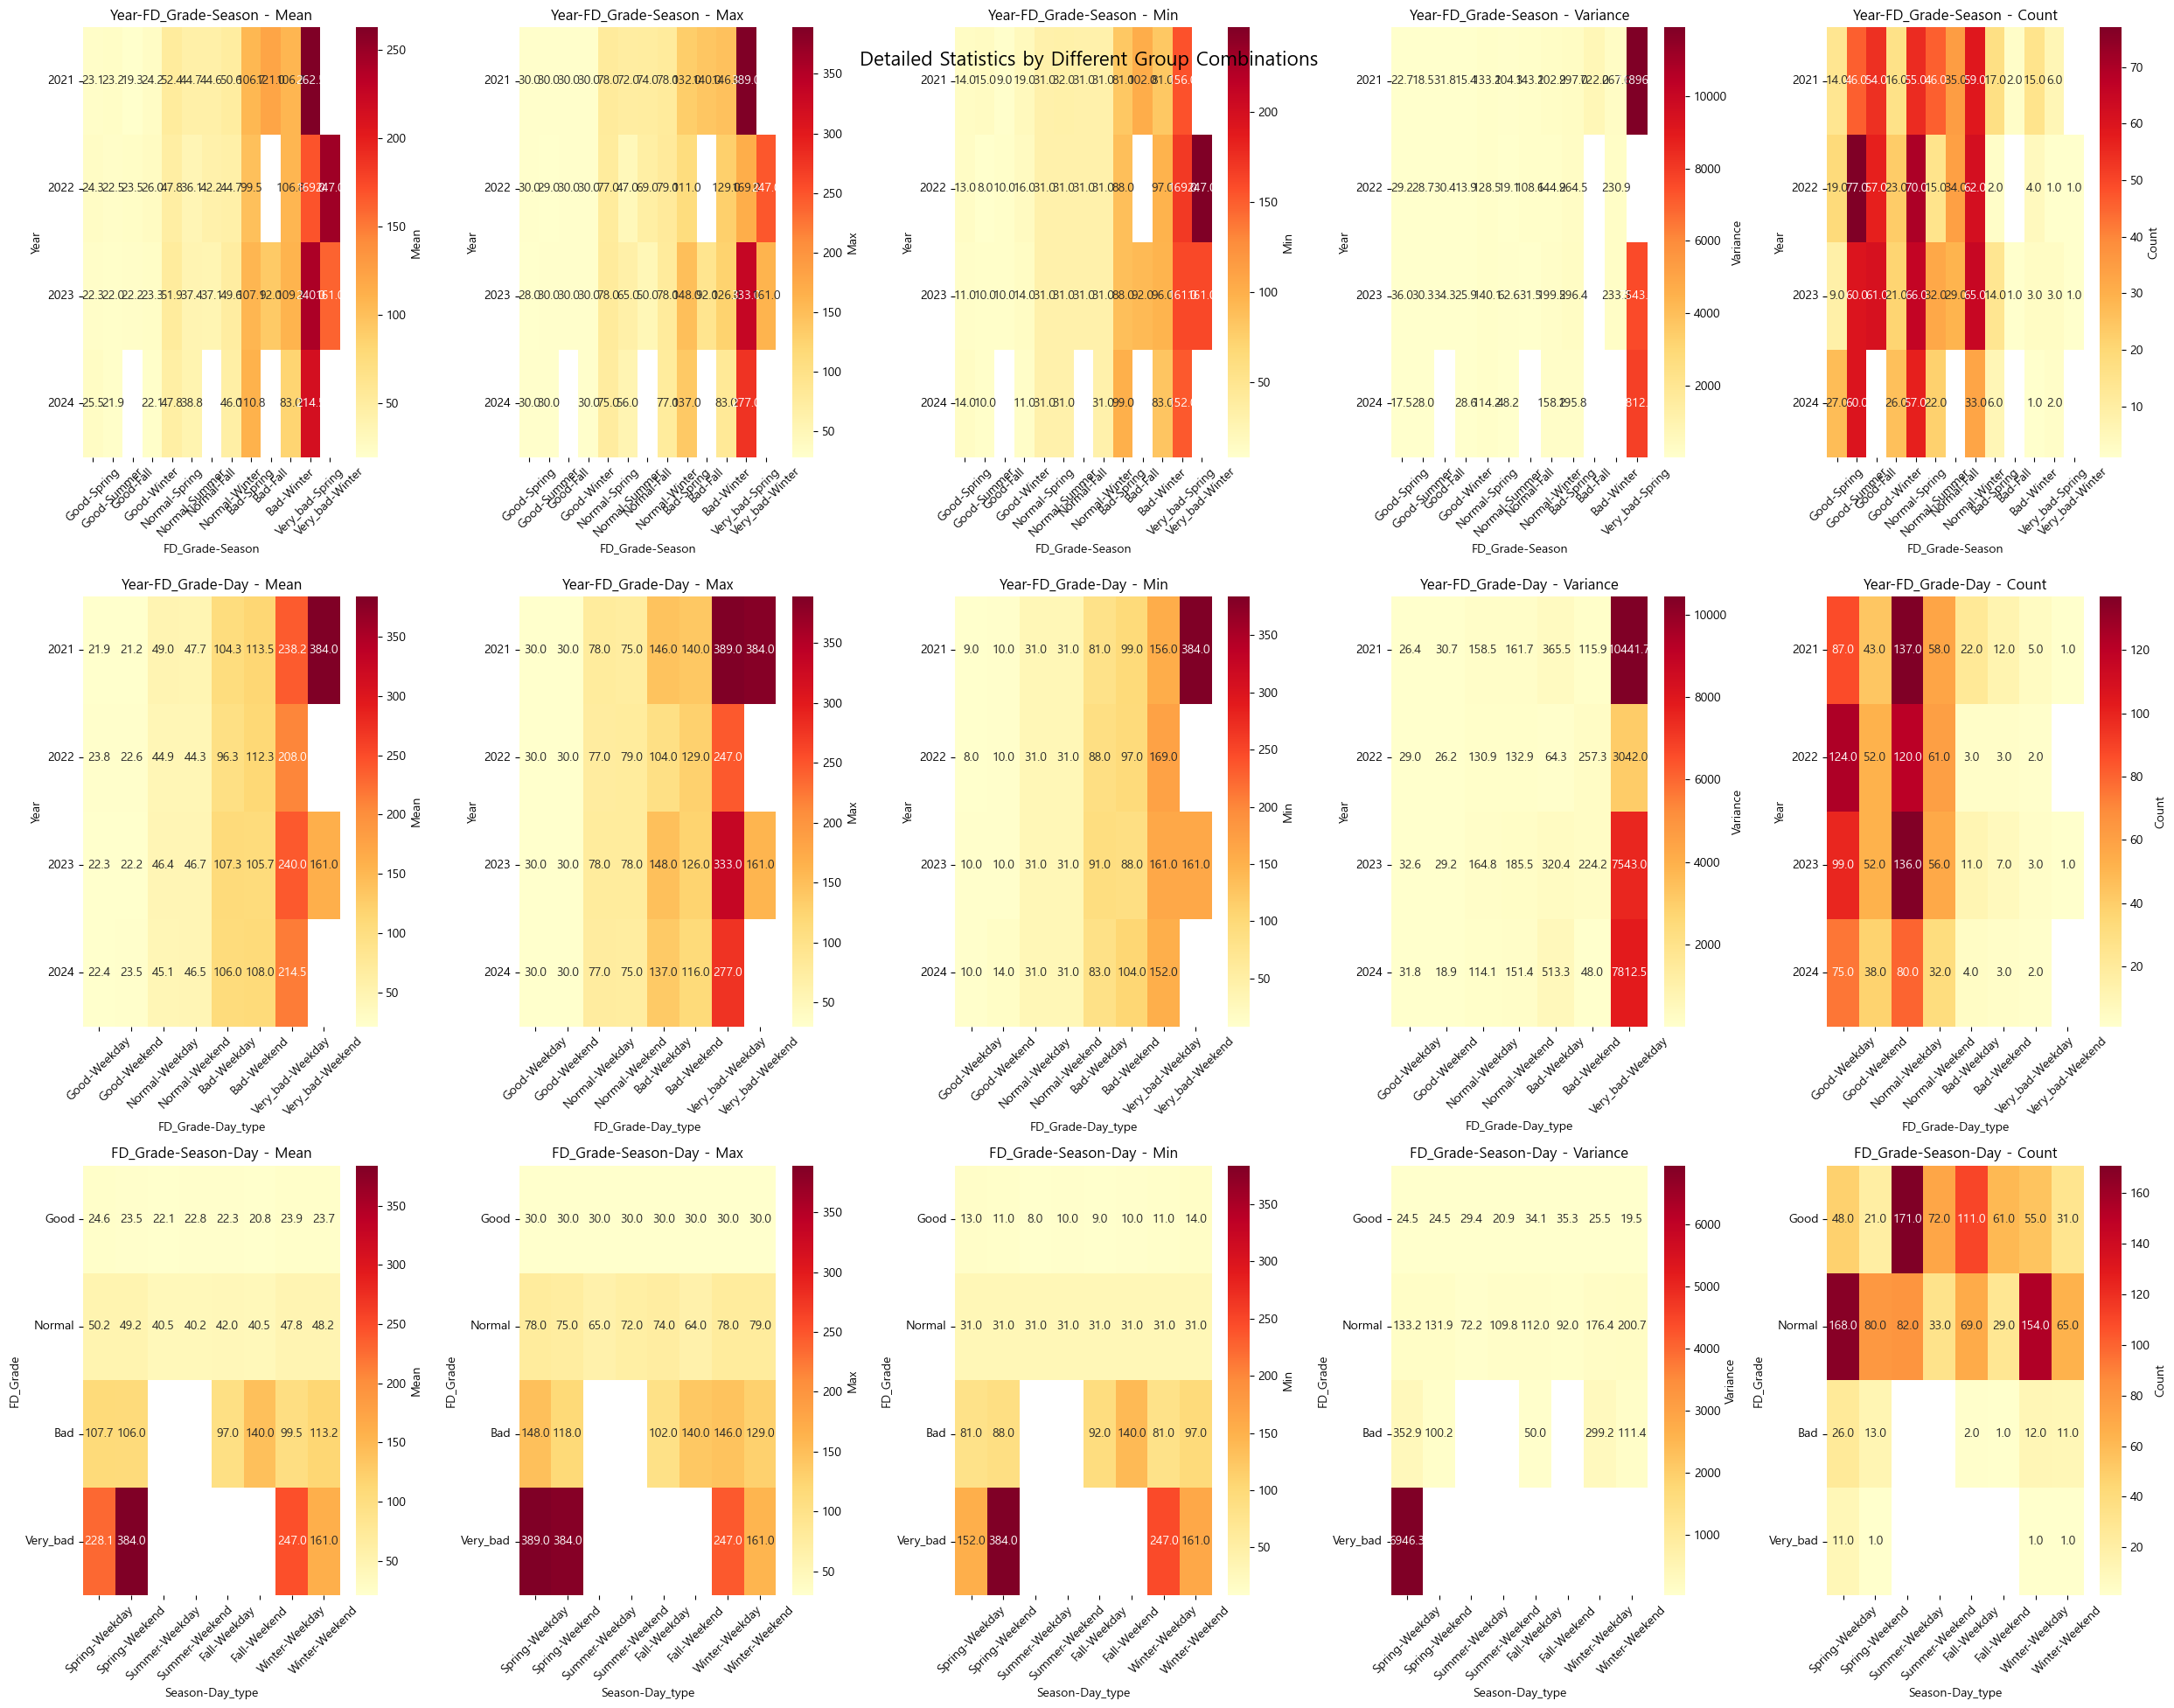

In [ ]:
def create_detailed_group_plots(stats_dict, figsize=(25, 20)):
    metrics = ['Mean', 'Max', 'Min', 'Variance', 'Count']
    group_keys = list(stats_dict.keys())
    
    # Create figure with main title
    fig = plt.figure(figsize=figsize)
    fig.suptitle('Detailed Statistics by Different Group Combinations', fontsize=16, y=0.95)
    
    # Create grid of subplots: 3 groups × 5 metrics
    for group_idx, group_key in enumerate(group_keys):
        stats = stats_dict[group_key]
        
        for metric_idx, metric in enumerate(metrics):
            # Calculate subplot position
            plot_num = group_idx * len(metrics) + metric_idx + 1
            ax = plt.subplot(len(group_keys), len(metrics), plot_num)
            
            plot_data = stats[metric].reset_index()
            
            if group_key == "Year-FD_Grade-Season":
                pivot_data = plot_data.pivot_table(
                    values=metric,
                    index='Year',
                    columns=['FD_Grade', 'Season'],
                    aggfunc='first',
                    observed=True
                )
                
                sns.heatmap(pivot_data, annot=True, fmt='.1f', 
                           cmap='YlOrRd', ax=ax, cbar_kws={'label': metric})
                ax.set_title(f'{group_key} - {metric}')
                
            elif group_key == "Year-FD_Grade-Day":
                pivot_data = plot_data.pivot_table(
                    values=metric,
                    index='Year',
                    columns=['FD_Grade', 'Day_type'],
                    aggfunc='first',
                    observed=True
                )
                
                sns.heatmap(pivot_data, annot=True, fmt='.1f', 
                           cmap='YlOrRd', ax=ax, cbar_kws={'label': metric})
                ax.set_title(f'{group_key} - {metric}')
                
            elif group_key == "FD_Grade-Season-Day":
                pivot_data = plot_data.pivot_table(
                    values=metric,
                    index='FD_Grade',
                    columns=['Season', 'Day_type'],
                    aggfunc='first',
                    observed=True
                )
                
                sns.heatmap(pivot_data, annot=True, fmt='.1f', 
                           cmap='YlOrRd', ax=ax, cbar_kws={'label': metric})
                ax.set_title(f'{group_key} - {metric}')
            
            plt.setp(ax.get_xticklabels(), rotation=45)
            plt.setp(ax.get_yticklabels(), rotation=0)
            
    plt.tight_layout()
    plt.show()

# 함수 호출
create_detailed_group_plots(triple_group_stats_FD3)

4. 모든 변수 조합 분석

In [26]:
# 4-1. 연도와 등급과 계절과 평일/주말을 조합해서 분석

- 미세먼지 (모든 변수 조합 분석)

In [ ]:
def group_analysis_by_four_columns(df, group_col1, group_col2, group_col3, group_col4, target_col):
    # 네 컬럼으로 그룹화
    grouped_df = df.groupby([group_col1, group_col2, group_col3, group_col4], observed=True)

    # 통계 계산 및 컬럼 이름 지정
    stats = grouped_df[target_col].agg([
    ("Max", "max"),                    # (열 이름, 계산 방법)
    ("Min", "min"),
    ("Mean", "mean"),
    ("Variance", "var"),
    ("Count", "count"),
    ("Median", "median"),                   # 중앙값
    ("Q1", lambda x: x.quantile(0.25)),     # 1사분위수 (Q1)
    ("Q3", lambda x: x.quantile(0.75)),     # 3사분위수 (Q3)
    ("IQR", lambda x: x.quantile(0.75) - x.quantile(0.25)),     # IQR
    ("Skewness", lambda x: skew(x)),        # 왜도
    ("Kurtosis", lambda x: kurtosis(x)),    # 첨도
    ("Range", lambda x: x.max() - x.min())  # 범위
])
    return stats

# 함수 실행 예시
df_Year_Season_FD_Grade_day_stats = group_analysis_by_four_columns(
                                df = m_df,
                                group_col1 = "Year", 
                                group_col2 = "Season",
                                group_col3 = "FD_Grade",  
                                group_col4 = "Day_type",
                                target_col = "Fine_dust(㎍/㎥)")

# 결과를 딕셔너리로 정리
quadruple_group_stats_FD4 = {
    "Year-FD_Grade-Season": df_Year_Season_FD_Grade_day_stats
}

# 결과 출력
print("2. 사중 그룹 분석")
for key, value in quadruple_group_stats_FD4.items():
    print(f"\n{key} Stats:\n", value)

2. 사중 그룹 분석

Year-FD_Grade-Season Stats:
                                  Max   Min        Mean    Variance  Count  \
Year Season FD_Grade Day_type                                               
2021 Spring Good     Weekday    30.0  16.0   24.000000   19.777778     10   
                     Weekend    26.0  14.0   20.750000   28.916667      4   
            Normal   Weekday    78.0  35.0   54.276385  132.452821     34   
                     Weekend    74.0  31.0   49.361353  125.365158     21   
            Bad      Weekday   132.0  81.0  106.071429  356.686813     14   
...                              ...   ...         ...         ...    ...   
2024 Winter Good     Weekday    30.0  11.0   21.666667   33.666667     15   
                     Weekend    28.0  14.0   22.727273   23.618182     11   
            Normal   Weekday    77.0  31.0   45.956981  154.174514     25   
                     Weekend    69.0  31.0   45.955189  194.770781      8   
            Bad      Weekday    83

- 시각화 (네개 변수 조합 분석)

C:\Users\human\AppData\Local\Temp\ipykernel_6580\1510673317.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([grade_data[stat] for stat in stats],
C:\Users\human\AppData\Local\Temp\ipykernel_6580\1510673317.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([grade_data[stat] for stat in stats],
C:\Users\human\AppData\Local\Temp\ipykernel_6580\1510673317.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot([grade_data[stat] for stat in stats],
C:\Users\human\AppData\Local\Temp\ipykernel_6580\1510673317.py:59: MatplotlibDeprecationWarning: The 'labels' parameter of b

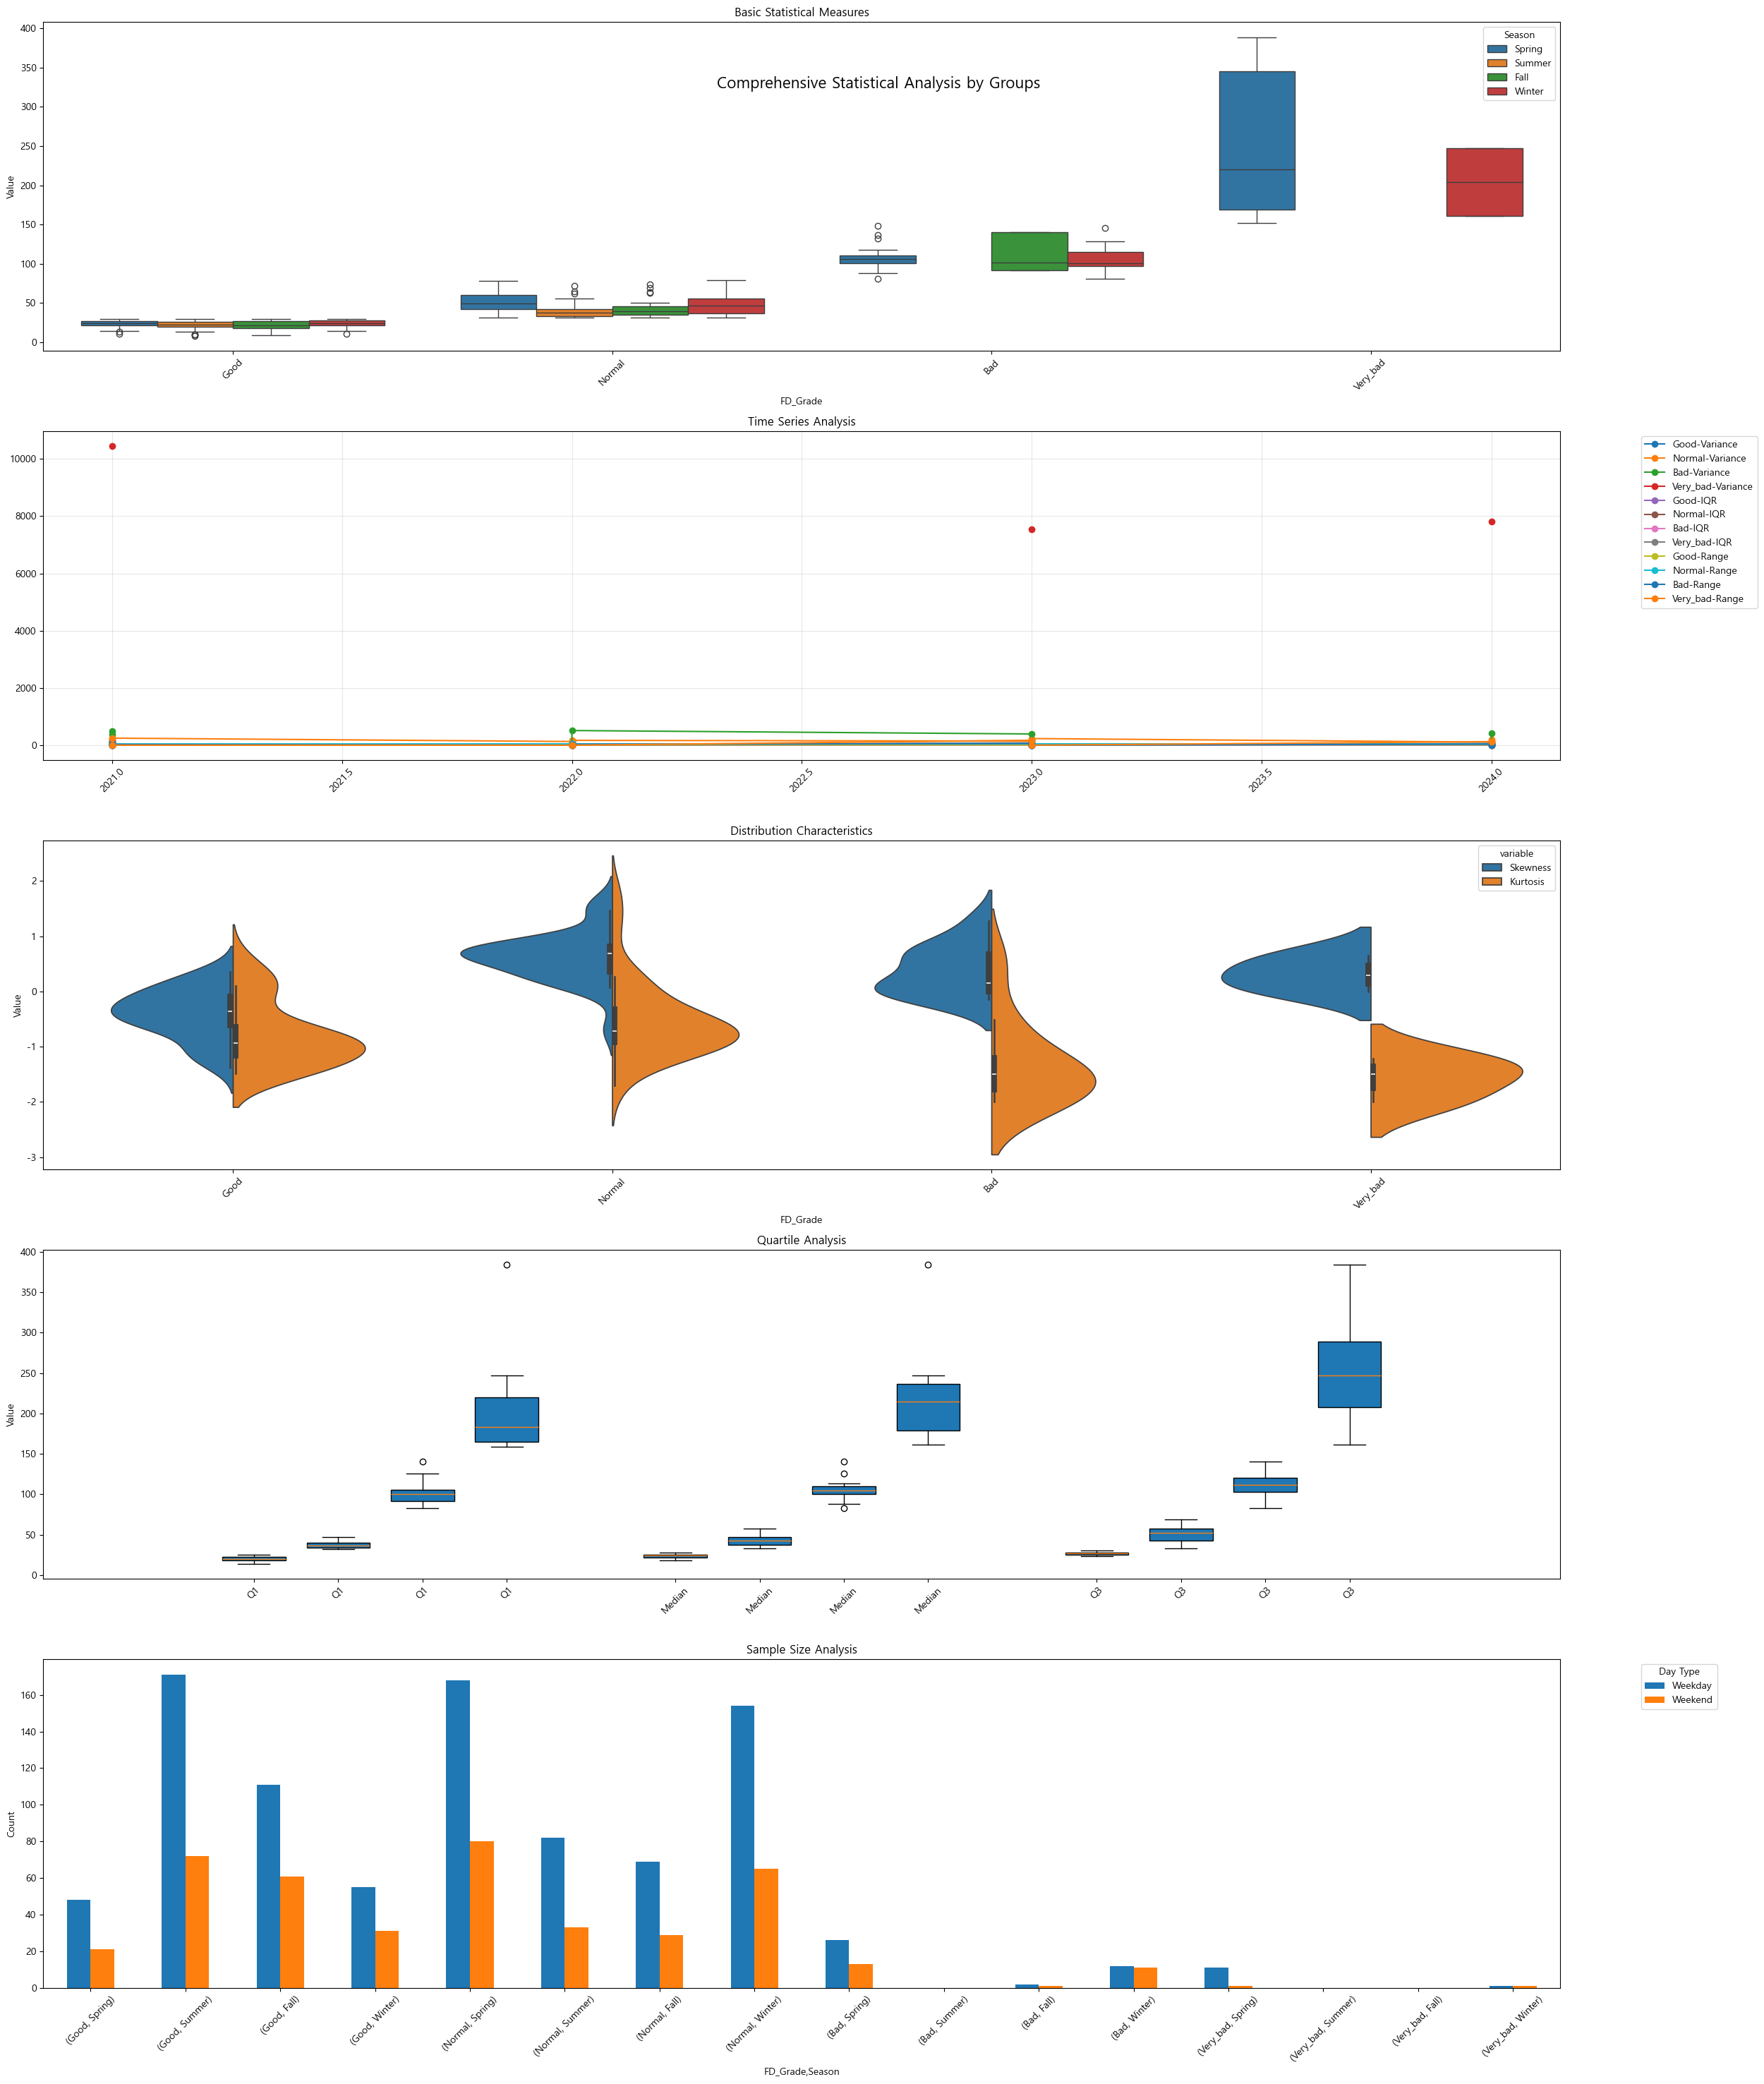

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def create_comprehensive_plots(stats_dict, figsize=(25, 30)):
    metrics = [
        ('Basic Stats', ['Mean', 'Median', 'Max', 'Min']),
        ('Dispersion', ['Variance', 'IQR', 'Range']),
        ('Distribution Shape', ['Skewness', 'Kurtosis']),
        ('Quartiles', ['Q1', 'Median', 'Q3']),
        ('Sample Size', ['Count'])
    ]
    
    # Create figure
    fig = plt.figure(figsize=figsize)
    fig.suptitle('Comprehensive Statistical Analysis by Groups', fontsize=16, y=0.95)
    
    def plot_basic_stats(data, stats, ax):
        pivot_data = data[stats].reset_index()
        melted_data = pd.melt(pivot_data, 
                             id_vars=['Year', 'Season', 'FD_Grade', 'Day_type'],
                             value_vars=stats)
        
        sns.boxplot(data=melted_data, x='FD_Grade', y='value', hue='Season', ax=ax)
        ax.set_title('Basic Statistical Measures')
        ax.set_ylabel('Value')
        ax.tick_params(axis='x', rotation=45)
        
    def plot_time_series(data, stats, ax):
        for stat in stats:
            pivot_data = data[stat].reset_index()
            for grade in pivot_data['FD_Grade'].unique():
                grade_data = pivot_data[pivot_data['FD_Grade'] == grade]
                ax.plot(grade_data['Year'], grade_data[stat], 
                       marker='o', label=f'{grade}-{stat}')
        
        ax.set_title('Time Series Analysis')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.grid(True, alpha=0.3)
        ax.tick_params(axis='x', rotation=45)
        
    def plot_distribution_stats(data, stats, ax):
        pivot_data = data[stats].reset_index()
        melted_data = pd.melt(pivot_data, 
                             id_vars=['Year', 'Season', 'FD_Grade', 'Day_type'],
                             value_vars=stats)
        
        sns.violinplot(data=melted_data, x='FD_Grade', y='value', 
                      hue='variable', split=True, ax=ax)
        ax.set_title('Distribution Characteristics')
        ax.set_ylabel('Value')
        ax.tick_params(axis='x', rotation=45)
        
    def plot_quartile_analysis(data, stats, ax):
        pivot_data = data[stats].reset_index()
        for grade in pivot_data['FD_Grade'].unique():
            grade_data = pivot_data[pivot_data['FD_Grade'] == grade]
            bp = ax.boxplot([grade_data[stat] for stat in stats],
                          positions=np.arange(len(stats)) + (0.2 * list(pivot_data['FD_Grade'].unique()).index(grade)),
                          widths=0.15,
                          patch_artist=True,
                          labels=stats)
            
        ax.set_title('Quartile Analysis')
        ax.set_ylabel('Value')
        ax.tick_params(axis='x', rotation=45)
        
    def plot_count_analysis(data, ax):
        pivot_data = data['Count'].reset_index()
        pivot_table = pivot_data.pivot_table(
            values='Count',
            index=['FD_Grade', 'Season'],
            columns='Day_type',
            aggfunc='sum'
        )
        
        pivot_table.plot(kind='bar', ax=ax)
        ax.set_title('Sample Size Analysis')
        ax.set_ylabel('Count')
        ax.legend(title='Day Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.tick_params(axis='x', rotation=45)
    
    # Create subplots for each metric group
    for idx, (title, stats_group) in enumerate(metrics, 1):
        ax = plt.subplot(len(metrics), 1, idx)
        stats = stats_dict["Year-FD_Grade-Season"]
        
        if title == 'Basic Stats':
            plot_basic_stats(stats, stats_group, ax)
        elif title == 'Dispersion':
            plot_time_series(stats, stats_group, ax)
        elif title == 'Distribution Shape':
            plot_distribution_stats(stats, stats_group, ax)
        elif title == 'Quartiles':
            plot_quartile_analysis(stats, stats_group, ax)
        else:  # Sample Size
            plot_count_analysis(stats, ax)
            
    plt.tight_layout()
    plt.show()

# 함수 호출
create_comprehensive_plots(quadruple_group_stats_FD4)